In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load training and testing data from Excel
train_data = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Shreya\DataScience_Assignment_Dataset\Logistic Regression\Titanic_train.csv')
test_data = pd.read_csv(r'C:\Users\Admin\OneDrive\Desktop\Shreya\DataScience_Assignment_Dataset\Logistic Regression\Titanic_test.csv')

In [4]:
train_data.shape

(891, 12)

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

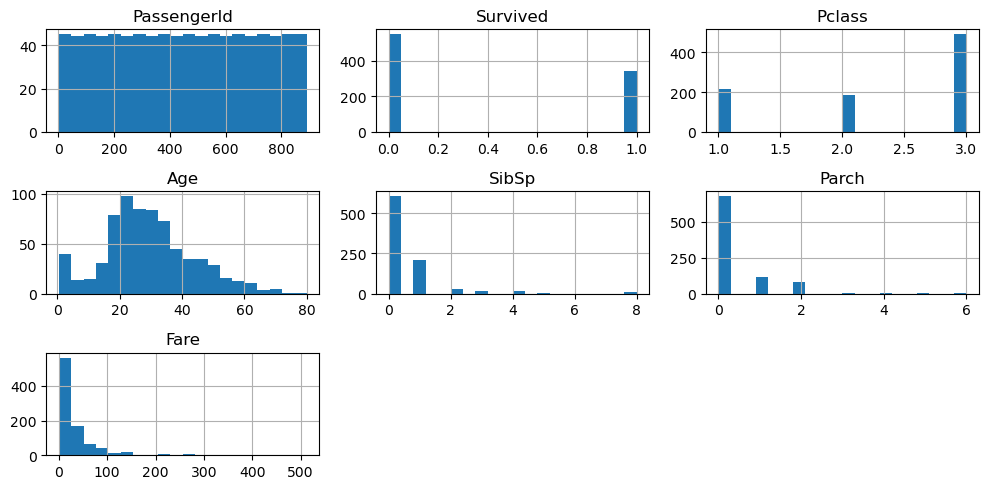

In [9]:
train_data.hist(bins = 20, figsize = (10,5))
plt.tight_layout()
plt.show()

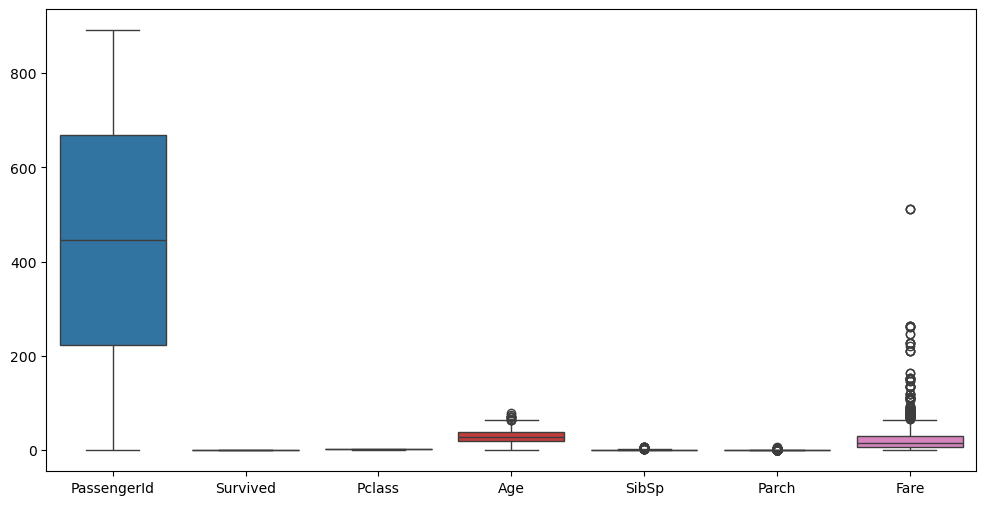

In [10]:
plt.figure(figsize = (12,6))
sns.boxplot(train_data)
plt.show()

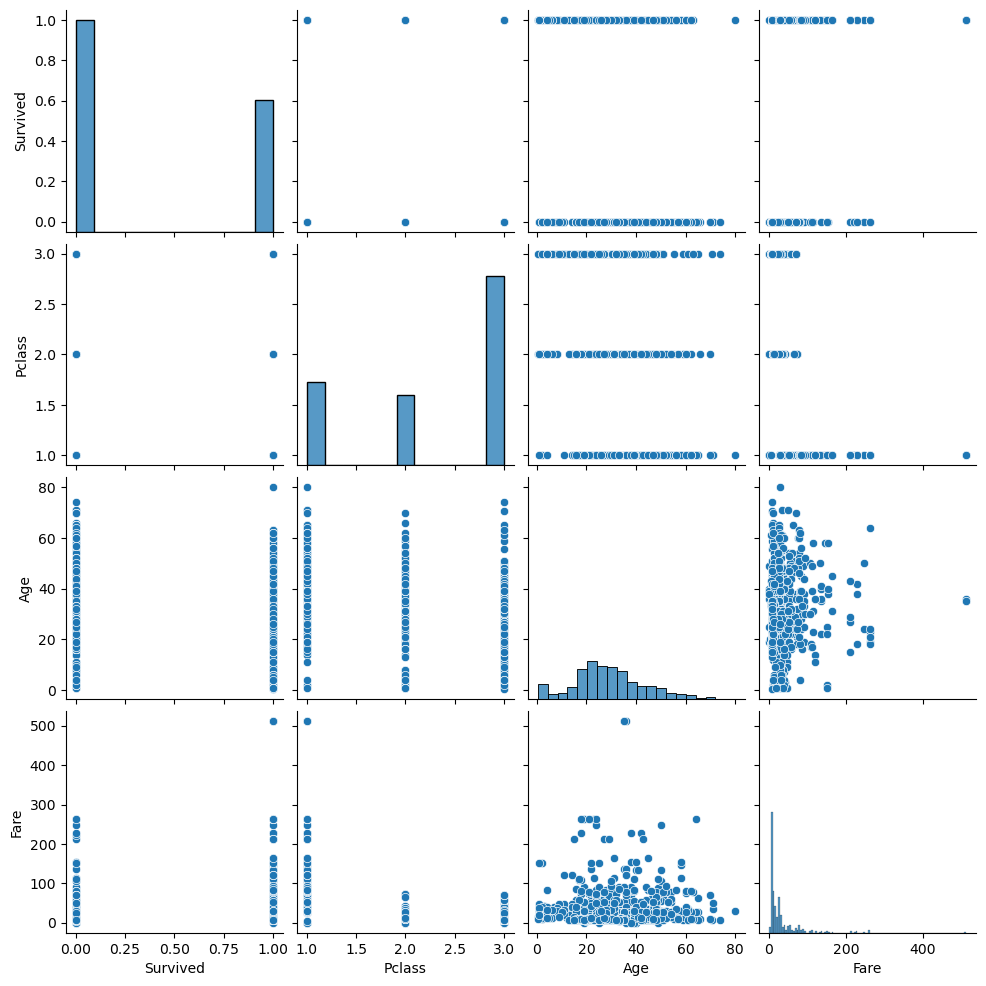

In [11]:
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare']])
plt.show()

In [12]:
Titanic_train_data = train_data.drop(columns = 'Cabin')

In [13]:
Titanic_train_data['Age'].fillna(Titanic_train_data['Age'].median(), inplace = True)
Titanic_train_data['Embarked'].fillna(Titanic_train_data['Embarked'].mode()[0], inplace = True)

In [14]:
Titanic_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Titanic_train_data['Sex'] = label_encoder.fit_transform(Titanic_train_data['Sex'])
Titanic_train_data['Embarked'] = label_encoder.fit_transform(Titanic_train_data['Embarked'])

# Split the data into train and test

In [17]:
x = Titanic_train_data.drop(columns = ['Survived','PassengerId','Name','Ticket'])
y = Titanic_train_data['Survived']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [19]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


In [20]:
from sklearn.preprocessing import StandardScaler
# Standardize numerical features
scaler = StandardScaler()
x_train[['Age', 'Fare']] = scaler.fit_transform(x_train[['Age', 'Fare']])
x_test[['Age', 'Fare']] = scaler.transform(x_test[['Age', 'Fare']])

In [21]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [22]:
# Predictions
y_pred = model.predict(x_test)
y_pred_prob = model.predict_proba(x_test)[:, 1]

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {F1_score:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")


Model Evaluation Metrics:
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639
ROC-AUC Score: 0.8824


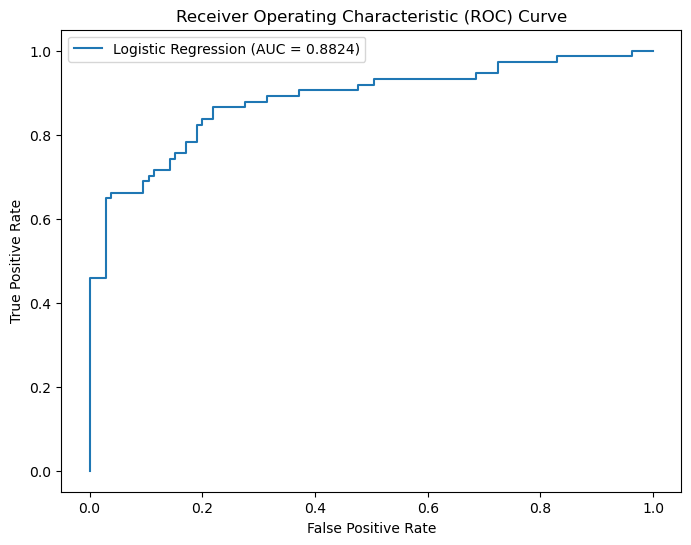

In [24]:
from sklearn.metrics import roc_curve
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='-', label='Logistic Regression (AUC = {:.4f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


# Interpretation

In [26]:
# Interpretation of Logistic Regression Coefficients
coefficients = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)

print("\nLogistic Regression Coefficients:")
print(coefficients)



Logistic Regression Coefficients:
    Feature  Coefficient
5      Fare     0.129183
4     Parch    -0.110682
6  Embarked    -0.218825
3     SibSp    -0.293312
2       Age    -0.391130
0    Pclass    -0.930452
1       Sex    -2.595474


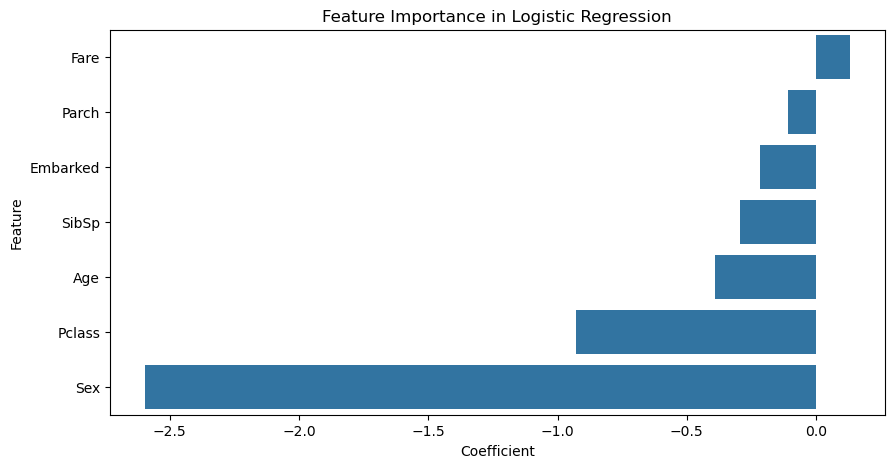


Interpretation:
- A positive coefficient means an increase in that feature increases the survival probability.
- A negative coefficient means an increase in that feature decreases the survival probability.
- The magnitude of the coefficient indicates feature importance.


In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title("Feature Importance in Logistic Regression")
plt.show()

print("\nInterpretation:")
print("- A positive coefficient means an increase in that feature increases the survival probability.")
print("- A negative coefficient means an increase in that feature decreases the survival probability.")
print("- The magnitude of the coefficient indicates feature importance.")


In [28]:
# Final processed dataset ready for Logistic Regression
print("\nProcessed Training Data Sample:")
print(x_train.head())


Processed Training Data Sample:
     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
331       1    1  1.253641      0      0 -0.078684         2
733       2    1 -0.477284      0      0 -0.377145         2
382       3    1  0.215086      0      0 -0.474867         2
704       3    1 -0.246494      1      0 -0.476230         2
813       3    0 -1.785093      4      2 -0.025249         2


# Testing Titanic_test dataset after training

In [30]:
test_data.shape

(418, 11)

In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [32]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
test_data[test_data.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [34]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
Titanic_test_data = test_data.drop(columns = 'Cabin')

In [36]:
Titanic_test_data['Age'].fillna(Titanic_test_data['Age'].median(), inplace = True)
Titanic_test_data['Fare'].fillna(Titanic_test_data['Fare'].median(), inplace = True)

In [37]:
passenger_ids = Titanic_test_data['PassengerId']
Titanic_test_df = Titanic_test_data.drop(columns = ['PassengerId','Name','Ticket'])

In [38]:
Titanic_test_df['Sex'] =  label_encoder.fit_transform(Titanic_test_df['Sex'])
Titanic_test_df['Embarked'] = label_encoder.fit_transform(Titanic_test_df['Embarked'])

In [39]:
Titanic_test_df_logReg = Titanic_test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
Titanic_test_df['Survived_logReg'] = model.predict(Titanic_test_df_logReg)

In [40]:
Titanic_test_survived_passenger = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived_logReg': Titanic_test_df['Survived_logReg']
})
Titanic_test_survived_passenger.head()

,PassengerId,Survived_logReg
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [41]:
Titanic_test_survived_passenger.to_csv('Titanic_Survival_Predictions_logReg.csv',index = False)
print("Predictions saved! You can check which passenger survived in Titanic_Survival_Predictions_logReg.csv")

Predictions saved! You can check which passenger survived in Titanic_Survival_Predictions_logReg.csv


# Interview Questions:

## 1. What is the difference between precision and recall?

Precision and recall are two key metrics used in classification problems, especially in imbalanced datasets.

1. Precision (also called Positive Predictive Value) measures how many of the predicted positive instances are actually positive.
Precision = TP/TP+FP
High precision means fewer false positives (FP).
Useful when false positives are costly (e.g., predicting a disease when the patient is actually healthy).

2. Recall (also called Sensitivity or True Positive Rate) measures how many actual positive instances were correctly predicted.
Recall = TP/TP+FN
High recall means fewer false negatives (FN).
Useful when missing positives is costly (e.g., detecting fraudulent transactions).

Key Difference:
Precision focuses on correctness among the predicted positives, while recall focuses on capturing all actual positives.
Trade-off: Increasing precision often decreases recall, and vice versa. The F1-score is a balance between them:
F1-score=2×(Precision×Recall/Precision+Recall)


## 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a resampling technique used to assess the performance and generalizability of a machine learning model by splitting 
the dataset into multiple training and validation subsets. The most commonly used method is k-fold cross-validation, where the dataset is 
divided into k subsets (folds), and the model is trained and tested k times, each time using a different fold as the test set while the remaining
k-1 folds are used for training.<br>
                  
Cross-Validation Important in Binary Classification is important because:<br>
1. Prevents Overfitting: Helps evaluate the model on different subsets of data, ensuring it generalizes well to unseen data instead of 
just memorizing patterns.<br>
2. Provides a More Reliable Performance Estimate: Since the model is evaluated multiple times, it reduces bias compared to a single train-test split.<br>
3. Handles Data Imbalance Better: In binary classification, if one class is dominant, a single train-test split may not represent the minority class well. 
Cross-validation ensures better class distribution across training and test sets.<br>
4. Optimizes Hyperparameters: Cross-validation is often used in Grid Search or Random Search to tune hyperparameters effectively.<br>
5. Reduces Dependence on a Single Train-Test Split: Helps avoid situations where model performance is skewed due to a lucky or unlucky split.<br>